# Image Classifier using Sequential API (TensorFlow/Keras)

- Explore *Fashion MNIST*
- Linear models achieve ~83% accuracy with this data set
- Use multilayer perceptron (MLP) model, `tensorflow`

In [1]:
import tensorflow as tf

data = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


- Dataset is already split into a training set (60,000 images) and a test set (10,000 images)
- Create validation sets for training

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [3]:
X_train.shape

(55000, 28, 28)

- 55,000 images that are 28x28 pixels
- Scale input features between 0-1 since neural network will be using Gradient Descent

In [4]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

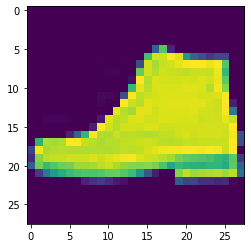

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[42])

Images are greyscale, change `cmap` to be `binary`

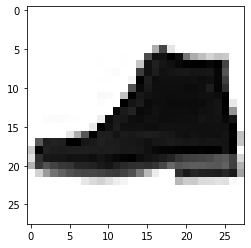

In [6]:
plt.imshow(X_train[42], cmap='binary')

In [7]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Create variable `class_names` with the corresponding names of the each image

In [8]:
class_names = ['Top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker',
              'Bag',
              'Ankle Boot']

Identify first 10 images

In [9]:
for i in range(10):
    print(class_names[y_train[i]])

Ankle Boot
Top
Top
Dress
Top
Pullover
Sneaker
Pullover
Sandal
Sandal


View a subset of the data, first 50 images

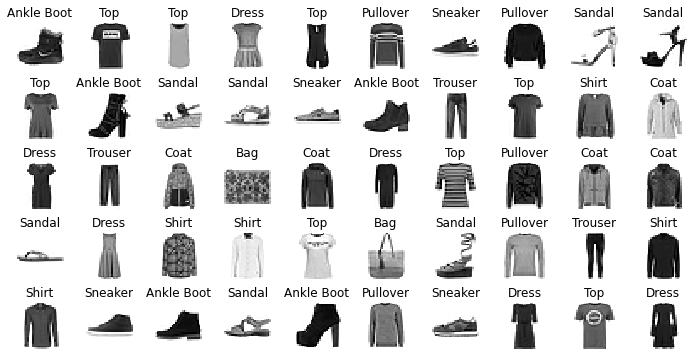

In [10]:
plt.figure(figsize=(12, 6))
for row in range(5):
    for col in range(10):
        index = 10 * row + col
        plt.subplot(5, 10, index + 1)
        plt.axis('off')
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.5, hspace=0.5)

Create model using sequential API with two hidden layers:

1. Create Sequential model
2. Flatten layer to convert each input image into 1D array
    - Reshape data to (-1,1)
    - No parameters
3. Dense hidden layer with 300 neurons
    - ReLU activation function
4. Dense hidden layer with 100 neurons
    - ReLU activation function
5. Dense hidden layer with 10 neurons, one for each class
    - Softmax activation function since classes are exclusive

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

2022-12-04 20:55:49.137638: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


- Overfitting likely since first hidden layer has 235,500 parameters, (784 * 300 connection weights) + 300 bias terms
- Model is also therefore quite flexible

In [13]:
model.layers

Current weights and biases

In [14]:
model.layers[1].name

'dense'

In [15]:
hidden1 = model.layers[1]
hidden1.name
model.get_layer('dense') is hidden1

True

In [16]:
w, b = hidden1.get_weights()

In [17]:
w

array([[-0.03913976,  0.0520663 ,  0.06412753, ..., -0.05390993,
         0.04865394,  0.07278684],
       [ 0.0090246 , -0.02881088,  0.02719713, ...,  0.01690478,
        -0.00892395, -0.0683197 ],
       [ 0.05996601,  0.01924186,  0.04411756, ...,  0.02490276,
         0.02889854, -0.02367943],
       ...,
       [-0.03073748, -0.02228724, -0.00483401, ..., -0.03886344,
        -0.0715584 , -0.06164756],
       [ 0.01007294,  0.04670283, -0.00528758, ...,  0.02698873,
        -0.04201626, -0.01211719],
       [-0.0529951 , -0.05414354, -0.060183  , ..., -0.03329216,
        -0.07338089, -0.05069088]], dtype=float32)

In [18]:
w.shape

(784, 300)

In [19]:
b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

- Weights are initialised randomly, biases are initialised to zero
- Compile model with loss function of `sparse_categorical_crossentropy` since labels are sparse, `sgd` optimizer, and `accuracy` metrics

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [21]:
history = model.fit(X_train, 
                    y_train, 
                    epochs=30,
                    validation_data=(X_valid, y_valid))

2022-12-04 20:55:49.699525: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7137 - accuracy: 0.7659 - val_loss: 0.5016 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4828 - accuracy: 0.8335 - val_loss: 0.4682 - val_accuracy: 0.8392
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4360 - accuracy: 0.8481 - val_loss: 0.4497 - val_accuracy: 0.8396
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4096 - accuracy: 0.8566 - val_loss: 0.4168 - val_accuracy: 0.8498
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3898 - accuracy: 0.8636 - val_loss: 0.3796 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8696 - val_loss: 0.3768 - val_accuracy: 0.8680
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3600 - accuracy: 0.8741 - val_loss: 0.3798 - val_accuracy:

- Accuracy of ~91%, could have trained for more epochs
- Validation accuracy plateaued

In [22]:
history.history

{'loss': [0.7137280702590942,
  0.48276329040527344,
  0.4360189139842987,
  0.4095570743083954,
  0.3897826671600342,
  0.3730837404727936,
  0.35998213291168213,
  0.34803083539009094,
  0.3381349444389343,
  0.32863831520080566,
  0.3200805187225342,
  0.3122290372848511,
  0.30451732873916626,
  0.2983904182910919,
  0.2914196252822876,
  0.2850460112094879,
  0.27901238203048706,
  0.2741489112377167,
  0.2687218189239502,
  0.26420557498931885,
  0.2597978711128235,
  0.25537344813346863,
  0.250076025724411,
  0.24622869491577148,
  0.24080781638622284,
  0.23689019680023193,
  0.2334170788526535,
  0.23002471029758453,
  0.2252092808485031,
  0.22347837686538696],
 'accuracy': [0.765890896320343,
  0.833545446395874,
  0.8480727076530457,
  0.8566181659698486,
  0.8636363744735718,
  0.8695999979972839,
  0.8740909099578857,
  0.8769999742507935,
  0.8811636567115784,
  0.8832363486289978,
  0.8868545293807983,
  0.8888182044029236,
  0.8898545503616333,
  0.8935999870300293,
 

<AxesSubplot:xlabel='epoch'>

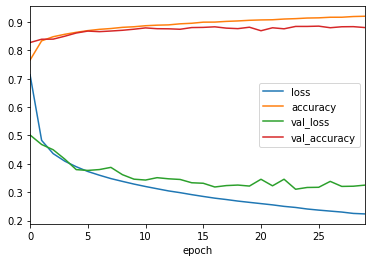

In [23]:
import pandas as pd
pd.DataFrame(history.history).plot(xlabel='epoch',
                                   xlim=[0,29])

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3388 - accuracy: 0.8770


[0.33880341053009033, 0.8769999742507935]

Implement `EarlyStopping` and `ModelCheckpoint`

In [25]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_keras_model.h5',
                                                save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2192 - accuracy: 0.9218 - val_loss: 0.3182 - val_accuracy: 0.8846
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2151 - accuracy: 0.9229 - val_loss: 0.3058 - val_accuracy: 0.8858
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2115 - accuracy: 0.9243 - val_loss: 0.3250 - val_accuracy: 0.8818
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2080 - accuracy: 0.9250 - val_loss: 0.3192 - val_accuracy: 0.8826
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2053 - accuracy: 0.9262 - val_loss: 0.3143 - val_accuracy: 0.8890
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2020 - accuracy: 0.9270 - val_loss: 0.3162 - val_accuracy: 0.8858
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1994 - accuracy: 0.9277 - val_loss: 0.3154 - val_ac

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3236 - accuracy: 0.8843


[0.323599636554718, 0.8842999935150146]

<AxesSubplot:xlabel='epoch'>

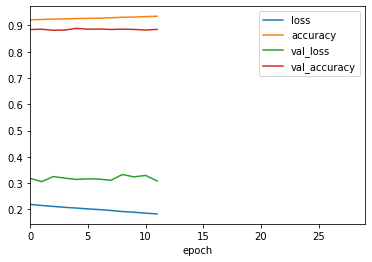

In [27]:
pd.DataFrame(history.history).plot(xlabel='epoch',
                                   xlim=[0,29])

- Hyperparameter tuning
- Try many combinations of hyperparameters and see which one works best on the validation set
- Use `RandomSearch` from the `keras_tuner` module
- Wrap model into function to build and compile keras model

In [28]:
def build_model(hp):
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons', min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    
    if optimizer == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,
                  metrics=['accuracy'])
    return model

In [29]:
import keras_tuner 

random_search_tuner = keras_tuner.RandomSearch(build_model, 
                                               objective='val_accuracy', 
                                               max_trials=10, 
                                               overwrite=True,
                                               directory='my_fashion_mnist', 
                                               project_name='my_rnd_search')

In [30]:
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 00m 35s]
val_accuracy: 0.7400000095367432

Best val_accuracy So Far: 0.8885999917984009
Total elapsed time: 00h 10m 38s


In [31]:
best_model = random_search_tuner.get_best_models(num_models=3)
best_model = best_model[0]

In [32]:
best_params = random_search_tuner.get_best_hyperparameters(num_trials=3)

In [33]:
best_params[0].values

{'n_hidden': 2,
 'n_neurons': 112,
 'learning_rate': 0.001294313472026772,
 'optimizer': 'adam'}

In [34]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 2
n_neurons: 112
learning_rate: 0.001294313472026772
optimizer: adam
Score: 0.8885999917984009


In [35]:
best_trial.metrics.get_last_value('val_accuracy')

0.8885999917984009

Fit best model

In [36]:
history = best_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2341 - accuracy: 0.9119
Epoch 2/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2260 - accuracy: 0.9138
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2194 - accuracy: 0.9163
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2148 - accuracy: 0.9181
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2076 - accuracy: 0.9213
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2027 - accuracy: 0.9227
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1951 - accuracy: 0.9252
Epoch 8/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1934 - accuracy: 0.9268
Epoch 9/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1869 - accuracy: 0.9295
Epoch 10/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.181

In [37]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8876


[0.3727948069572449, 0.8876000046730042]

Implement early stopping and continue training

In [38]:
history = best_model.fit(X_train, y_train, epochs=100,
                        validation_data=(X_valid, y_valid),
                        callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1747 - accuracy: 0.9332 - val_loss: 0.3918 - val_accuracy: 0.8880
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1755 - accuracy: 0.9324 - val_loss: 0.3896 - val_accuracy: 0.8884
Epoch 3/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1696 - accuracy: 0.9345 - val_loss: 0.3676 - val_accuracy: 0.8890
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1671 - accuracy: 0.9361 - val_loss: 0.4101 - val_accuracy: 0.8876
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1640 - accuracy: 0.9375 - val_loss: 0.3868 - val_accuracy: 0.8852
Epoch 6/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1605 - accuracy: 0.9390 - val_loss: 0.3849 - val_accuracy: 0.8868
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1551 - accuracy: 0.9406 - val_loss: 0.4155 - val_ac

<AxesSubplot:xlabel='epoch'>

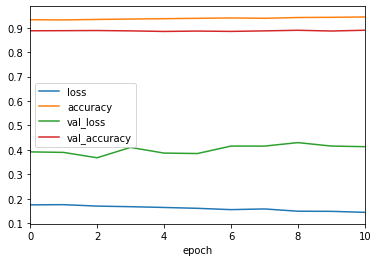

In [39]:
pd.DataFrame(history.history).plot(xlabel='epoch',
                                   xlim=[0,10])

In [40]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8897


[0.39561155438423157, 0.8896999955177307]

Model overfitting, validation loss increasing. High accuracy on the training set, however not much improvement on the test set accuracy when calling `model.evaluate(X_test, y_test)`.

- Build DNN with 20 hidden layers of 100 neurons each
- Use He initialisation and Swish activation function

In [41]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    activation='swish',
                                    kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

- Nadam optimiser with lr of 5e-5
- Compile model

In [42]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

- Create callbacks

In [43]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20,
                                                     restore_best_weights=True)
model_checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('model',
                                                         save_best_only=True)
callbacks = [early_stopping_cb, model_checkpoint_cb]

- Fit model

In [44]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 29s 15ms/step - loss: 0.8394 - accuracy: 0.6805 - val_loss: 0.5608 - val_accuracy: 0.7958


2022-12-04 21:12:37.614043: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4971 - accuracy: 0.8176 - val_loss: 0.4617 - val_accuracy: 0.8262
Epoch 3/100
1719/1719 [==============================] - 25s 15ms/step - loss: 0.4365 - accuracy: 0.8412 - val_loss: 0.4208 - val_accuracy: 0.8422
Epoch 4/100
1719/1719 [==============================] - 25s 14ms/step - loss: 0.4051 - accuracy: 0.8513 - val_loss: 0.4468 - val_accuracy: 0.8362
Epoch 5/100
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3843 - accuracy: 0.8587 - val_loss: 0.3904 - val_accuracy: 0.8564
Epoch 6/100
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3691 - accuracy: 0.8650 - val_loss: 0.3793 - val_accuracy: 0.8586
Epoch 7/100
1719/1719 [==============================] - 26s 15ms/step - loss: 0.3558 - accuracy: 0.8685 - val_loss: 0.3814 - val_accuracy: 0.8570
Epoch 8/100
1719/1719 [==============================] - 25s 15ms/step - loss: 0.3445 - accuracy: 0.8707 - val_loss: 0

In [45]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3550 - accuracy: 0.8733


[0.35502368211746216, 0.8733000159263611]

- Batch normalisation to address the vanishing/exploding gradients problems
- Adding an operation in the model just before or after the activation function of each hidden layer, simply zero-centering and normalizing each input, then scaling and shifting the result using two new parameter vectors per layer
- Batch normalisation lets the model learn the optimal scale and mean of each of the layer’s inputs

In [46]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation('swish'))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [47]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 52s 23ms/step - loss: 0.8456 - accuracy: 0.7097 - val_loss: 0.4386 - val_accuracy: 0.8412
Epoch 2/100
1719/1719 [==============================] - 39s 23ms/step - loss: 0.5146 - accuracy: 0.8209 - val_loss: 0.4505 - val_accuracy: 0.8392
Epoch 3/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.4482 - accuracy: 0.8437 - val_loss: 0.3943 - val_accuracy: 0.8598
Epoch 4/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.4185 - accuracy: 0.8534 - val_loss: 0.3966 - val_accuracy: 0.8518
Epoch 5/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3869 - accuracy: 0.8637 - val_loss: 0.4488 - val_accuracy: 0.8432
Epoch 6/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.3668 - accuracy: 0.8689 - val_loss: 0.3980 - val_accuracy: 0.8582
Epoch 7/100
1719/1719 [==============================] - 39s 22ms/step - loss: 0.3491 - accuracy: 0.8764 - val_loss: 0

In [48]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3265 - accuracy: 0.8841


[0.32645362615585327, 0.8841000199317932]

- With batch normalisation, 94% accuracy achieved on the training set
- Implement regularisation to prevent overfitting
- l1 and l2 regularisation with 0.01 regularisation factor

In [54]:
from functools import partial

layerRegularised = partial(tf.keras.layers.Dense,
                          activation='elu',
                          kernel_initializer='he_normal',
                          kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01))

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28, 28]),
                                 layerRegularised(300),
                                 layerRegularised(100),
                                 layerRegularised(10, activation='softmax',
                                 kernel_initializer='glorot_uniform')])

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [55]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 39s 23ms/step - loss: 0.2473 - accuracy: 0.9108 - val_loss: 0.3650 - val_accuracy: 0.8702
Epoch 2/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2405 - accuracy: 0.9138 - val_loss: 0.3404 - val_accuracy: 0.8790
Epoch 3/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2323 - accuracy: 0.9168 - val_loss: 0.3574 - val_accuracy: 0.8698
Epoch 4/100
1719/1719 [==============================] - 39s 23ms/step - loss: 0.2291 - accuracy: 0.9192 - val_loss: 0.3468 - val_accuracy: 0.8770
Epoch 5/100
1719/1719 [==============================] - 39s 23ms/step - loss: 0.2222 - accuracy: 0.9206 - val_loss: 0.3482 - val_accuracy: 0.8832
Epoch 6/100
1719/1719 [==============================] - 39s 23ms/step - loss: 0.2155 - accuracy: 0.9223 - val_loss: 0.3618 - val_accuracy: 0.8786
Epoch 7/100
1719/1719 [==============================] - 38s 22ms/step - loss: 0.2109 - accuracy: 0.9253 - val_loss: 0

- Almost 95% accuracy
- Implement alpha dropout layers

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100,
                                    kernel_initializer='lecun_normal',
                                    activation='selu'))

model.add(tf.keras.layers.AlphaDropout(rate=0.1))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [57]:
model.fit(X_train, 
          y_train, 
          epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1719/1719 [==============================] - 29s 14ms/step - loss: 0.6177 - accuracy: 0.7833 - val_loss: 0.4997 - val_accuracy: 0.8350
Epoch 2/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4620 - accuracy: 0.8372 - val_loss: 0.4615 - val_accuracy: 0.8428
Epoch 3/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4299 - accuracy: 0.8497 - val_loss: 0.4480 - val_accuracy: 0.8316
Epoch 4/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4061 - accuracy: 0.8570 - val_loss: 0.4225 - val_accuracy: 0.8472
Epoch 5/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3978 - accuracy: 0.8628 - val_loss: 0.4179 - val_accuracy: 0.8514
Epoch 6/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3787 - accuracy: 0.8683 - val_loss: 0.4128 - val_accuracy: 0.8580
Epoch 7/100
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3742 - accuracy: 0.8693 - val_loss: 0

- Model severely overfitting with alpha dropout
- Can potentially implement Monte-Carlo dropout